Markdown for Jupter: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet <br>
Jupyter Notebooks in VS code: https://code.visualstudio.com/docs/datascience/jupyter-notebooks

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
plt.style.use('ggplot')

# Load dataset and understand data information

In [7]:
test=pd.read_csv('/Users/ningzhang/Study/DataScience_takehome/Practices-DS-takehome-Ning/2.Translation_Test/test_table.csv', parse_dates=['date'])
# parse_dates format date data as data format. https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           453321 non-null  int64         
 1   date              453321 non-null  datetime64[ns]
 2   source            453321 non-null  object        
 3   device            453321 non-null  object        
 4   browser_language  453321 non-null  object        
 5   ads_channel       181877 non-null  object        
 6   browser           453321 non-null  object        
 7   conversion        453321 non-null  int64         
 8   test              453321 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 31.1+ MB


In [9]:
test.describe()

,user_id,date,conversion,test
count,453321.000000,453321,453321.000000,453321.000000
mean,499937.514728,2015-12-02 08:56:07.976334336,0.049579,0.476446
min,1.000000,2015-11-30 00:00:00,0.000000,0.000000
25%,249816.000000,2015-12-01 00:00:00,0.000000,0.000000
50%,500019.000000,2015-12-03 00:00:00,0.000000,0.000000
75%,749522.000000,2015-12-04 00:00:00,0.000000,1.000000
max,1000000.000000,2015-12-04 00:00:00,1.000000,1.000000
std,288665.193436,NaN,0.217073,0.499445


In [12]:
# check null data
test.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
dtype: int64

In [17]:
# understand the values of each column
for col in test.columns:
    uniques=test[col].unique()
    print(col, ',', len(uniques),',',  uniques[:5])

user_id , 453321 , [315281 497851 848402 290051 548435]
date , 5 , <DatetimeArray>
['2015-12-03 00:00:00', '2015-12-04 00:00:00', '2015-11-30 00:00:00',
 '2015-12-01 00:00:00', '2015-12-02 00:00:00']
Length: 5, dtype: datetime64[ns]
source , 3 , ['Direct' 'Ads' 'SEO']
device , 2 , ['Web' 'Mobile']
browser_language , 3 , ['ES' 'Other' 'EN']
ads_channel , 6 , [nan 'Google' 'Facebook' 'Bing' 'Yahoo']
browser , 7 , ['IE' 'Chrome' 'Android_App' 'FireFox' 'Iphone_App']
conversion , 2 , [1 0]
test , 2 , [0 1]


In [18]:
user=pd.read_csv('/Users/ningzhang/Study/DataScience_takehome/Practices-DS-takehome-Ning/2.Translation_Test/user_table.csv')
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [19]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [20]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [21]:
user.isnull().sum()

user_id    0
sex        0
age        0
country    0
dtype: int64

In [23]:
for col in user.columns:
    uniques=user[col].unique()
    print(col, ',', len(uniques), ',', uniques[:5])

user_id , 452867 , [765821 343561 118744 987753 554597]
sex , 2 , ['M' 'F']
age , 52 , [20 27 23 29 31]
country , 17 , ['Mexico' 'Nicaragua' 'Colombia' 'Venezuela' 'Spain']


# Merge two tables

In [25]:
# check uniqueness
print('Test users: ', len(test['user_id'].unique()), len(test['user_id'].unique())==len(test))
print('User users: ', len(user['user_id'].unique()), len(user['user_id'].unique())==len(user))

Test users:  453321 True
User users:  452867 True


In [26]:
data=pd.merge(left=test, right=user, how='left', on='user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           453321 non-null  int64         
 1   date              453321 non-null  datetime64[ns]
 2   source            453321 non-null  object        
 3   device            453321 non-null  object        
 4   browser_language  453321 non-null  object        
 5   ads_channel       181877 non-null  object        
 6   browser           453321 non-null  object        
 7   conversion        453321 non-null  int64         
 8   test              453321 non-null  int64         
 9   sex               452867 non-null  object        
 10  age               452867 non-null  float64       
 11  country           452867 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 41.5+ MB


In [28]:
data.describe()

,user_id,date,conversion,test,age
count,453321.000000,453321,453321.000000,453321.000000,452867.000000
mean,499937.514728,2015-12-02 08:56:07.976334336,0.049579,0.476446,27.130740
min,1.000000,2015-11-30 00:00:00,0.000000,0.000000,18.000000
25%,249816.000000,2015-12-01 00:00:00,0.000000,0.000000,22.000000
50%,500019.000000,2015-12-03 00:00:00,0.000000,0.000000,26.000000
75%,749522.000000,2015-12-04 00:00:00,0.000000,1.000000,31.000000
max,1000000.000000,2015-12-04 00:00:00,1.000000,1.000000,70.000000
std,288665.193436,NaN,0.217073,0.499445,6.776678


In [29]:
data.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

# A/B test

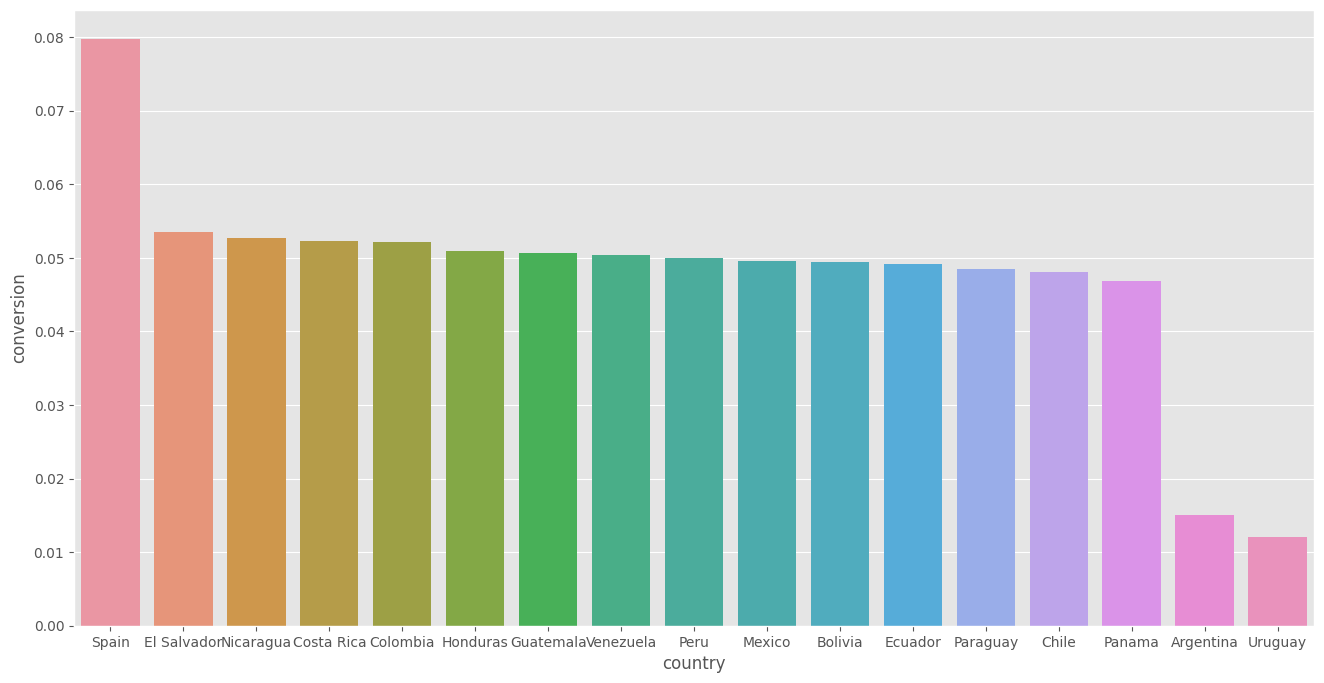

In [44]:
# Prove that Spain coverts better than other LatAm countries
groupby_country=data[data['test']==0][['conversion', 'country']].groupby('country').mean()
groupby_country.head()
groupby_country=groupby_country.reset_index()
groupby_country=groupby_country.sort_values(by='conversion', ascending=False)
groupby_country.head()

#visualization
fig, ax=plt.subplots(figsize=(16,8))
sns.barplot(data=groupby_country, x='country', y='conversion', ax=ax)
plt.show()

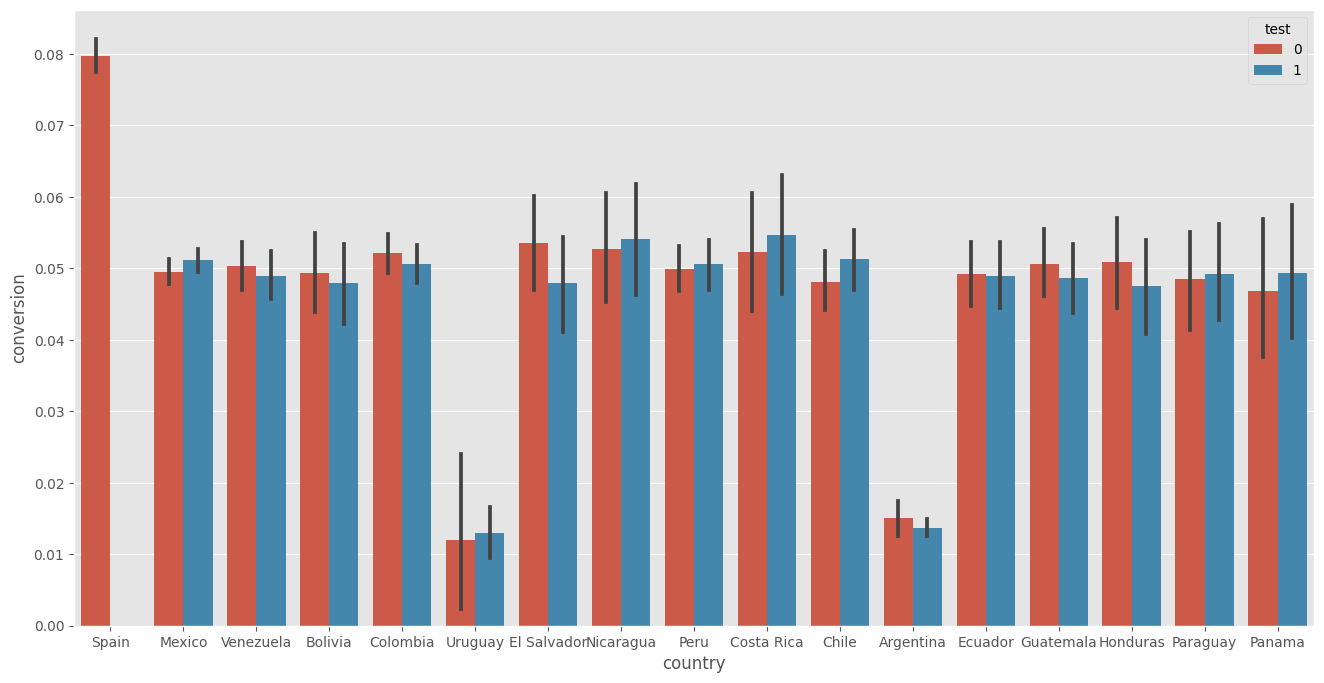

In [45]:
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=data, x='country', y='conversion', hue='test', ax=ax)
plt.show()

In [51]:
# AB test
test_data=data[data['country']!='Spain']
test_val=test_data[test_data['test']==1]['conversion'].values
cotl_val=test_data[test_data['test']==0]['conversion'].values
print(type(test_val))
print(test_val.mean(), cotl_val.mean())

p_values=ttest_ind(test_val,cotl_val, equal_var=False) # equal_var=False means the two samples have different variance
print(p_values)

<class 'numpy.ndarray'>
0.043424713982118966 0.04833042316066309
Ttest_indResult(statistic=-7.3939374121344805, pvalue=1.4282994754055316e-13)


The null hypothsis is that the two independent samples have a identical mean. <br> 
The p value is big that we can't reject the null hypothese. So the use of local translater can't bring a better conversion.